In [2]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))

In [3]:
# cd into the folder with the python file
%cd "C:\Users\HAOXUAN YIN\Desktop\code\suite2p\Suite2p_Pipeline"  

C:\Users\HAOXUAN YIN\Desktop\code\suite2p\Suite2p_Pipeline


In [4]:
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt
from pathlib import Path
import multiprocessing as mp
import roicat
%load_ext autoreload
%autoreload 2
import roicat.util
import tempfile
import os
import analysis_function as af

In [5]:
# IMPORTANT PARAMETERS

dir_allOuterFolders = [r"C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB1",r"C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB3", r"C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB5", r"C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\C"]  # suite2p data folder path
um_per_pixel = 0.4  # Micrometer per pixel of image field of view
radius_in = 4  # IMPORTANT PARAMETER: Value in micrometers used to define the maximum shift/offset between two images that are considered to be aligned. Larger means more lenient alignment.
z_threshold = 20  # IMPORTANT PARAMETER: Z-score required to define two images as aligned. Larger values results in more stringent alignment requirements.
CLAHE_grid_block_size = 3 # IMPORTANT PARAMETER. Use smaller values for higher precision but higher chance of failure.
use_CLAHE = False # IMPORTANT PARAMETER. Set this to False if the data is poorly aligned (most cases)
dir_save = r"C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\results---AB1,3,5,C plane0"  # save directory
file_name = "aligned_img.npy" 

save_path = os.path.join(dir_save, file_name) # save directory for the aligned image, use later for visualisation

In [6]:
# Generate aligned images
af.generate_aligned_FOV_images(dir_allOuterFolders, um_per_pixel, radius_in, z_threshold, CLAHE_grid_block_size, use_CLAHE, dir_save, save_path)

paths to all stat and ops files:
C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB1\stat.npy
C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB3\stat.npy
C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB5\stat.npy
C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\C\stat.npy
C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB1\ops.npy
C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB3\ops.npy
C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB5\ops.npy
C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\C\ops.npy


d:\anaconda\envs\roicat\Lib\site-packages\roicat\util.py:416: UserWarning: RH WARNING: unable to get gcc version. Got error: [WinError 2] 系统找不到指定的文件。
  warnings.warn(f'RH WARNING: unable to get gcc version. Got error: {e}')


Starting: Importing FOV images from ops files
Completed: Set FOV_height and FOV_width successfully.
Completed: Imported 4 FOV images.
Setting FOV_images...
Completed: Set FOV_images for 4 sessions successfully.
Importing spatial footprints from stat files.


  0%|          | 0/4 [00:00<?, ?it/s]

Imported 4 sessions of spatial footprints into sparse arrays.
Completed: Created session_bool.
Completed: Set spatialFootprints for 4 sessions successfully.
Completed: Created centroids.
Starting: Creating centered ROI images from spatial footprints...
Completed: Created ROI images.
Using device: cpu


d:\anaconda\envs\roicat\Lib\site-packages\roicat\util.py:416: UserWarning: RH WARNING: unable to get gcc version. Got error: [WinError 2] 系统找不到指定的文件。
  warnings.warn(f'RH WARNING: unable to get gcc version. Got error: {e}')


Loaded LightGlue model
Converting float fractional index to integer index: 0.5 -> 2


Finding geometric registration warps:   0%|          | 0/4 [00:00<?, ?it/s]

Alignment z_in scores: [24.0, 47.2, 438722080.0, 29.2]. z_threshold: 20.
All images aligned successfully!
Converting float fractional index to integer index: 0.5 -> 2
Finding nonrigid registration warps with mode: DeepFlow, template_method: image


Finding nonrigid registration warps:   0%|          | 0/4 [00:00<?, ?image/s]

Composing nonrigid warp matrices...
Applying nonrigid registration warps to images...
Registering ROIs...


Registering ROIs:   0%|          | 0/4 [00:00<?, ?it/s]

Check generated images, ensure that FOVs look aligned


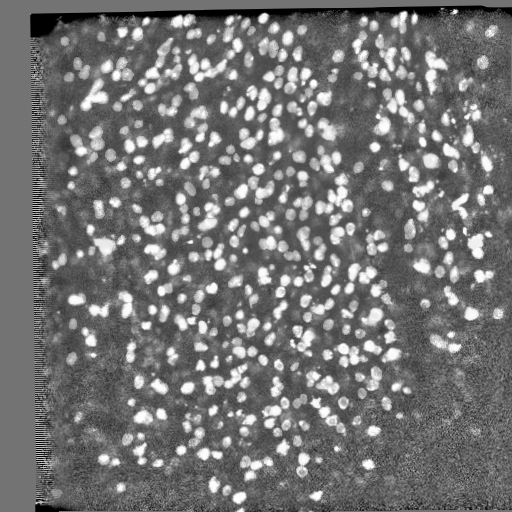

In [8]:
image_path = r"C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\results---AB1,3,5,C plane0\aligned_img.npy"

ims = np.load(image_path, allow_pickle=True)
roicat.visualization.display_toggle_image_stack(ims)

If the images look aligned, run the function to process and align data

paths to all stat and ops files:
C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB1\stat.npy
C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB3\stat.npy
C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB5\stat.npy
C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\C\stat.npy
C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB1\ops.npy
C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB3\ops.npy
C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB5\ops.npy
C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\C\ops.npy
Starting: Importing FOV images from ops files
Completed: Set FOV_height and FOV_width successfully.
Completed: Imported 4 FOV images.
Setting FOV_images...
Completed: Set FOV_images for 4 sessions successfully.
Importing spatial footprints from stat files.


  0%|          | 0/4 [00:00<?, ?it/s]

Imported 4 sessions of spatial footprints into sparse arrays.
Completed: Created session_bool.
Completed: Set spatialFootprints for 4 sessions successfully.
Completed: Created centroids.
Starting: Creating centered ROI images from spatial footprints...
Completed: Created ROI images.
Using device: cpu


d:\anaconda\envs\roicat\Lib\site-packages\roicat\util.py:416: UserWarning: RH WARNING: unable to get gcc version. Got error: [WinError 2] 系统找不到指定的文件。
  warnings.warn(f'RH WARNING: unable to get gcc version. Got error: {e}')


Loaded LightGlue model
Converting float fractional index to integer index: 0.5 -> 2


Finding geometric registration warps:   0%|          | 0/4 [00:00<?, ?it/s]

Alignment z_in scores: [24.0, 47.2, 438722080.0, 29.2]. z_threshold: 20.
All images aligned successfully!
Converting float fractional index to integer index: 0.5 -> 2
Finding nonrigid registration warps with mode: DeepFlow, template_method: image


Finding nonrigid registration warps:   0%|          | 0/4 [00:00<?, ?image/s]

Composing nonrigid warp matrices...
Applying nonrigid registration warps to images...
Registering ROIs...


Registering ROIs:   0%|          | 0/4 [00:00<?, ?it/s]

Preparing the Toeplitz convolution matrix
Performing convolution for blurring
File already exists locally: C:\Users\HAOXUAN YIN\AppData\Local\Temp\ROInet.zip
Hash of local file matches provided hash_hex.
Extracting C:\Users\HAOXUAN YIN\AppData\Local\Temp\ROInet.zip to C:\Users\HAOXUAN YIN\AppData\Local\Temp.
Completed zip extraction.
Imported model from C:\Users\HAOXUAN YIN\AppData\Local\Temp\ROInet_tracking_20220527\model.py
Loaded params_model from C:\Users\HAOXUAN YIN\AppData\Local\Temp\ROInet_tracking_20220527\params.json


d:\anaconda\envs\roicat\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\anaconda\envs\roicat\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Generated network using params_model
Loaded state_dict into network from C:\Users\HAOXUAN YIN\AppData\Local\Temp\ROInet_tracking_20220527\ConvNext_tiny__1_0_best__simCLR.pth
Loaded network onto device cpu
Starting Image Resizer


d:\anaconda\envs\roicat\Lib\site-packages\roicat\util.py:416: UserWarning: RH WARNING: unable to get gcc version. Got error: [WinError 2] 系统找不到指定的文件。
  warnings.warn(f'RH WARNING: unable to get gcc version. Got error: {e}')


Creating dataloader
Defined image transformations: Sequential(
  (0): ScaleDynamicRange(scaler_bounds=(0, 1))
  (1): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
  (2): TileChannels(dim=0)
)
Defined dataset
Defined dataloader
starting: running data through network


d:\anaconda\envs\roicat\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


  0%|          | 0/264 [00:00<?, ?it/s]

completed: running data through network
SWT initialized
Starting: SWT transform on ROIs


  0%|          | 0/21.12 [00:00<?, ?it/s]

Completed: SWT transform on ROIs


d:\anaconda\envs\roicat\Lib\site-packages\roicat\util.py:416: UserWarning: RH WARNING: unable to get gcc version. Got error: [WinError 2] 系统找不到指定的文件。
  warnings.warn(f'RH WARNING: unable to get gcc version. Got error: {e}')


Computing pairwise similarity between ROIs...


  0%|          | 0/16 [00:00<?, ?it/s]

Joining blocks into full similarity matrices...
Joining s_sf...
Joining s_NN...
Joining s_SWT...
Joining s_sesh...
Finding k-range of center of mass distance neighbors for each ROI...
Normalizing Neural Network similarity scores...


  0%|          | 0/2112 [00:00<?, ?it/s]

Normalizing SWT similarity scores...


  0%|          | 0/2112 [00:00<?, ?it/s]

d:\anaconda\envs\roicat\Lib\site-packages\roicat\util.py:416: UserWarning: RH WARNING: unable to get gcc version. Got error: [WinError 2] 系统找不到指定的文件。
  warnings.warn(f'RH WARNING: unable to get gcc version. Got error: {e}')


Finding mixing parameters using automated hyperparameter tuning...


  0%|          | 0/1200 [00:00<?, ?it/s]

Completed automatic parameter search. Best value found: 11908.162109375 with parameters {'power_NN': 0.23972892452188493, 'power_SWT': 0.004184292032569592, 'p_norm': -3.0192557144512975, 'sig_NN_kwargs': {'mu': 0.9787200785141824, 'b': 0.10257126844639508}, 'sig_SWT_kwargs': {'mu': 0.020348068003292488, 'b': 0.7432519626270648}}
Pruning similarity graphs with d_cutoff = 0.75...
Clustering with CaImAn's sequential Hungarian algorithm method...


d:\anaconda\envs\roicat\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


  0%|          | 0/3 [00:00<?, ?it/s]

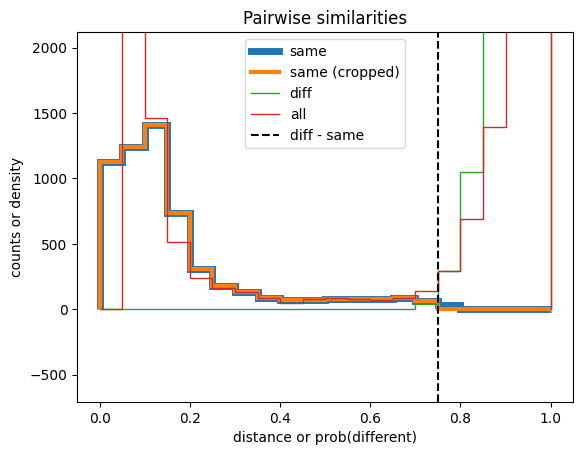

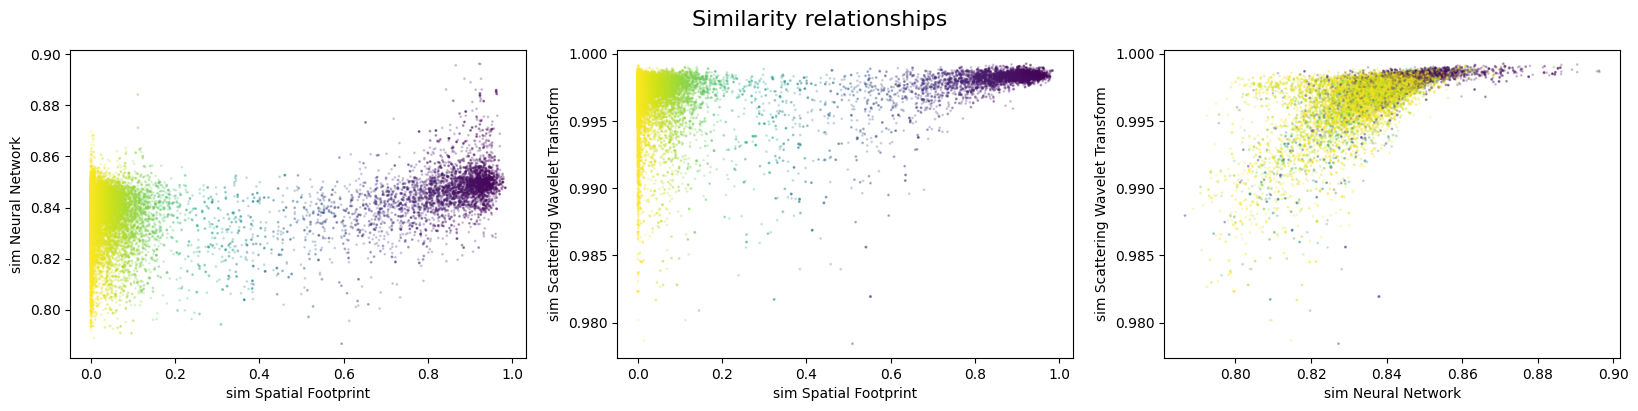

In [9]:
af.process_and_align_suite2p_data(dir_allOuterFolders, um_per_pixel, radius_in, z_threshold, CLAHE_grid_block_size, use_CLAHE, dir_save, save_path)

Explore the Tracking Results

In [10]:
# Load the result
use_classificationResults = False
results = roicat.util.RichFile_ROICaT(path=r"C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\results---AB1,3,5,C plane0\result.tracking.results_all.richfile").load()  # result path
if use_classificationResults:
    results_classification = roicat.util.RichFile_ROICaT(path='/media/rich/bigSSD/data_tmp/test_data/mouse_1.classification_drawn.run_data.richfile').load()
else:
    results_classification = None

In [11]:
# Load Fluorescence data
path_list = [r"C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB1\F.npy", r"C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB3\F.npy", r"C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\AB5\F.npy", r"C:\Users\HAOXUAN YIN\Desktop\code\suite2p\SOMR (plane0)\C\F.npy"] # list of planes fluorescence data
fluorescence_data = []
for npy_file_path in path_list:
    data = np.load(npy_file_path)
    fluorescence_data.append(data)  # add all fluorescence data to a list

Processing Steps: 

Either (1) remove bad ROIs using the iscell mask from Suite2p → remove clusters with too few ROIs → apply quality control using metrics, or (2) skip the first two steps and start directly from the quality metrics.

Step 1: Remove bad ROIs using iscell mask

In [11]:
# Apply the iscell mask

iscell_list = [r"C:\Users\HAOXUAN YIN\Desktop\code\suite2p\test\AB1\iscell.npy", r"C:\Users\HAOXUAN YIN\Desktop\code\suite2p\test\AB3\iscell.npy", r"C:\Users\HAOXUAN YIN\Desktop\code\suite2p\test\AB5\iscell.npy", r"C:\Users\HAOXUAN YIN\Desktop\code\suite2p\test\C\iscell.npy", r"C:\Users\HAOXUAN YIN\Desktop\code\suite2p\test\D\iscell.npy"] # list of planes of iscell data
iscell = []
for npy_file_path in iscell_list:
    data = np.load(npy_file_path)
    list = []
    for d in data:
        if d[1] > 0.5:    # if the probability that it is a cell is alrger than 0.5
            list.append(True)
        else:
            list.append(False)   # convert the 0/1 & probability in iscell file from suite2p into True or False
    iscell.append(list)  # add all iscell data to a list
    
roi_labels = results['clusters']['labels_bySession']

## Get the iscell masked labels
labels_iscell = roicat.util.mask_UCIDs_with_iscell(
    ucids=roi_labels,
    iscell=iscell,
)

## Squeeze the labels to remove the unassigned labels (not necessary, but reduces the number of unique labels)
labels_iscell = roicat.util.squeeze_UCID_labels(ucids=labels_iscell, return_array=True)  ## [(n_rois,)] * n_sessions

## Align the data without the masked labels
data_aligned = roicat.util.match_arrays_with_ucids(
    arrays=fluorescence_data, 
    ucids=roi_labels,
)

## Align the data with the iscell masks
data_aligned_masked_iscell = roicat.util.match_arrays_with_ucids(
    arrays= fluorescence_data,  ## expects list (length n_sessions) of numpy arrays (shape (n_rois, n_timepoints))
    ucids=labels_iscell,  ## expects list (length n_sessions) of numpy arrays (shape (n_rois,))  OR   concatenated numpy array (shape (n_rois_total,))
)

## Check the results
print("Original data shapes [(n_rois, n_timepoints)] * n_sessions:")
print([d.shape for d in fluorescence_data])
print('')
print("First aligned data shapes [(n_rois, n_timepoints)] * n_sessions:")
print([d.shape for d in data_aligned])
print('')
print("iscell masked aligned data shapes [(n_rois, n_timepoints)] * n_sessions:")
print([d.shape for d in data_aligned_masked_iscell])


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\HAOXUAN YIN\\Desktop\\code\\suite2p\\test\\AB1\\iscell.npy'

In [8]:
# get the ids for each cluster after iscell masked
ucids = []  
for session in labels_iscell:
    for label in session:
        ucids.append(label)
ucids = np.array(ucids)
ucids_unique = np.unique(ucids[ucids>=0])

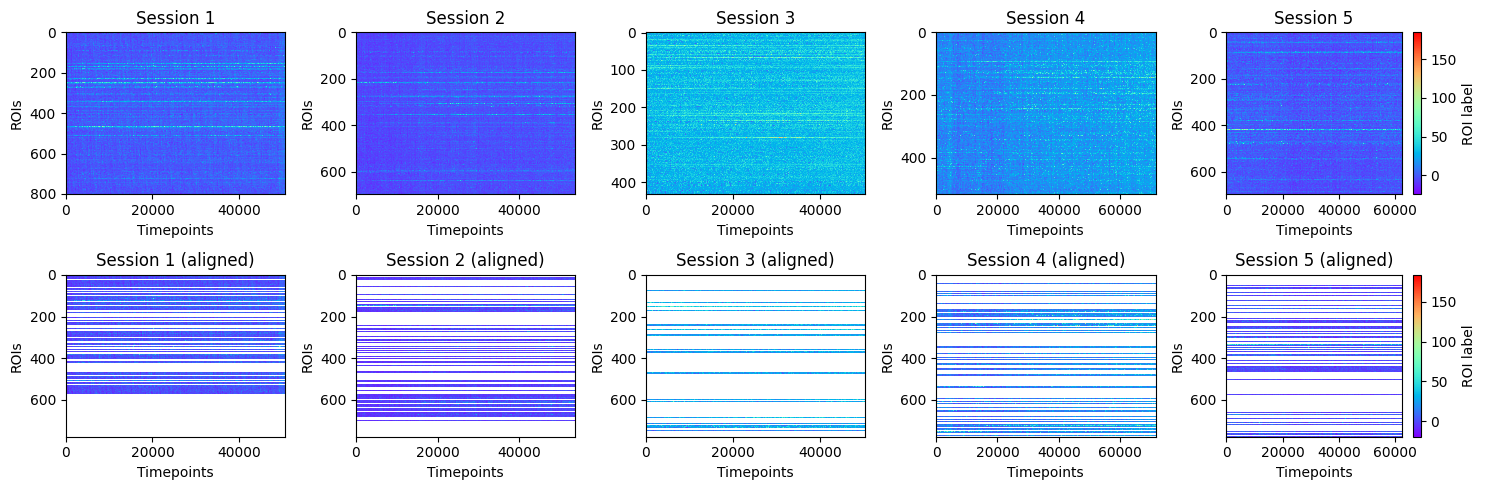

In [10]:
# plot the result --- row1 is raw data, row2 is the iscell masked data
n_sessions = 5   # number of sessions
fig, axs = plt.subplots(2, n_sessions, figsize=(15, 5))
for i in range(n_sessions):
    axs[0, i].imshow(fluorescence_data[i],         aspect="auto", cmap="rainbow", interpolation="none")
    axs[1, i].imshow(data_aligned_masked_iscell[i], aspect="auto", cmap="rainbow", interpolation="none")
    axs[0, i].set_title(f"Session {i+1}")
    axs[1, i].set_title(f"Session {i+1} (aligned)")
    axs[0, i].set_xlabel("Timepoints")
    axs[1, i].set_xlabel("Timepoints")
    axs[0, i].set_ylabel("ROIs")
    axs[1, i].set_ylabel("ROIs")
    ## Colorbar
    if i == n_sessions - 1:
        fig.colorbar(axs[0, i].imshow(fluorescence_data[i], aspect="auto", cmap="rainbow", interpolation="none"), ax=axs[0, i], label="ROI label")
        fig.colorbar(axs[1, i].imshow(data_aligned_masked_iscell[i], aspect="auto", cmap="rainbow", interpolation="none"), ax=axs[1, i], label="ROI label")
plt.tight_layout()

Step 2: Remove clusters with fewer ROIs

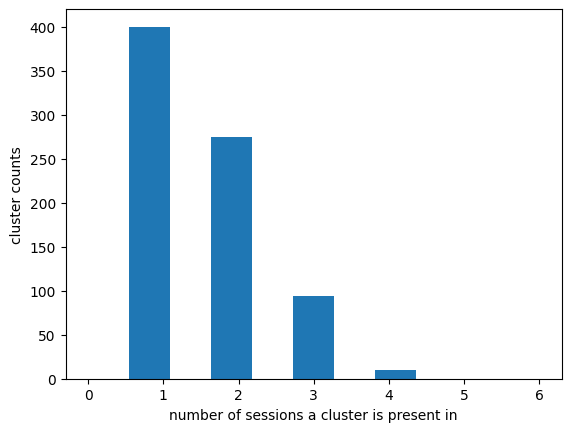

In [11]:
# %matplotlib widget
_, counts = np.unique(ucids, return_counts=True)
n_sessions = len(results['clusters']['labels_bySession'])
plt.figure()
plt.hist(counts, bins=n_sessions*2 + 1, range=(0, n_sessions+1));
plt.xlabel('number of sessions a cluster is present in');
plt.ylabel('cluster counts');

# with the iscell mask, not all clusters appear in all sessions

INFO: 13.35% of UCIDs that appear in at least 3 sessions.


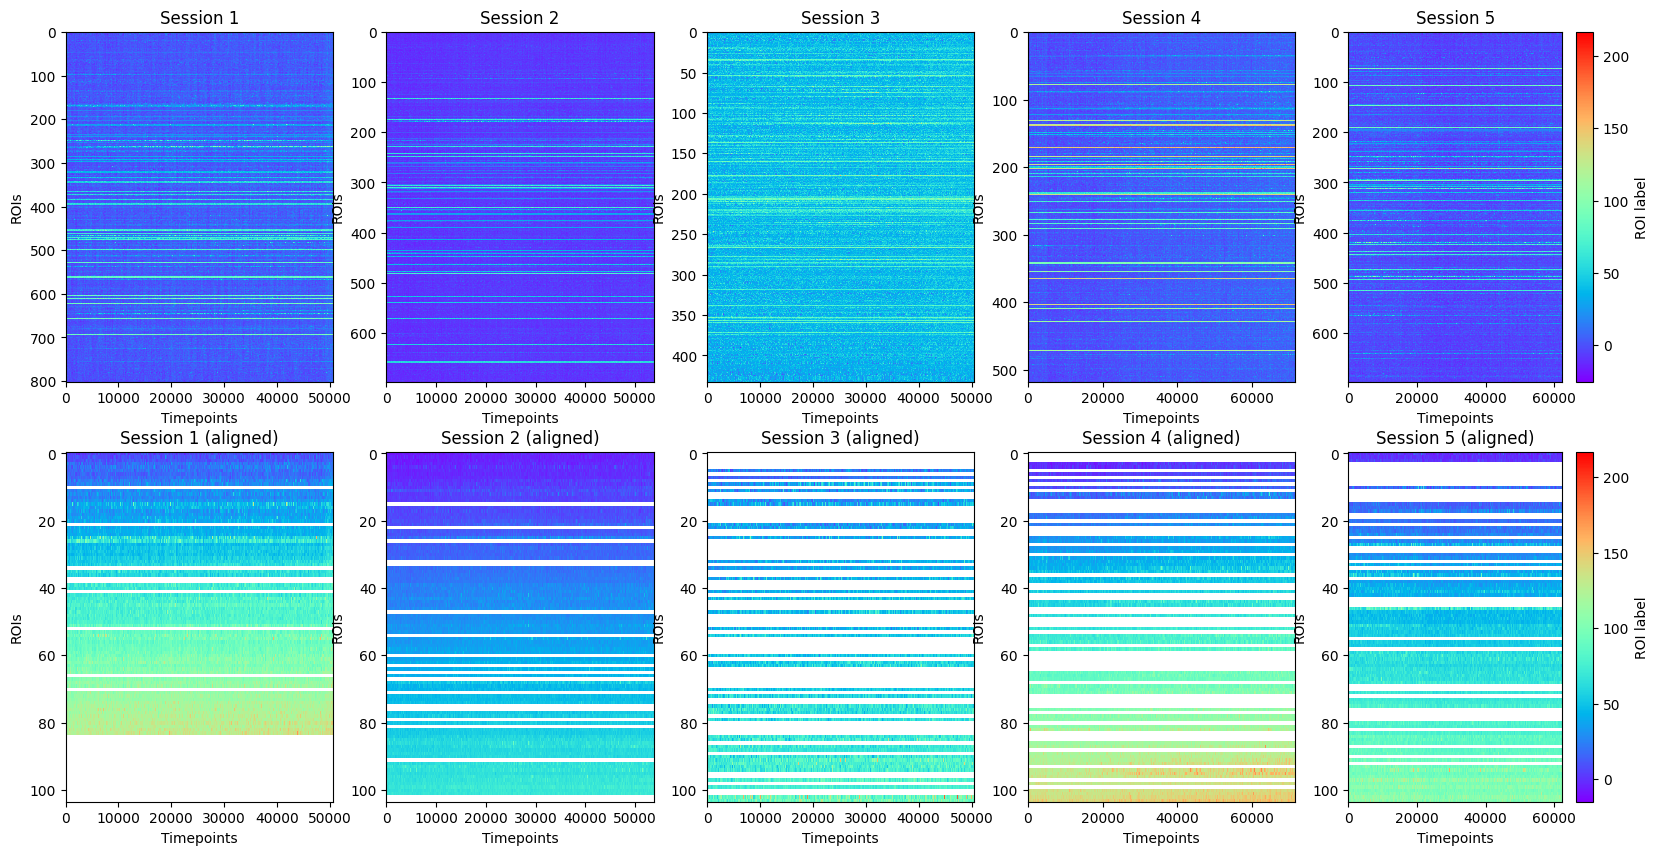

In [12]:
n_sessions_minimum = 3

## Remove labels / UCIDs that are not assigned in at least [n_sessions_minimum] sessions
labels_minSesh = roicat.util.discard_UCIDs_with_fewer_matches(
    ucids=labels_iscell,
    n_sesh_thresh=n_sessions_minimum,
)

## Squeeze the labels to remove the unassigned labels (not necessary, but reduces the number of unique labels)
labels_minSesh = roicat.util.squeeze_UCID_labels(ucids=labels_minSesh, return_array=True)  ## [(n_rois,)] * n_sessions

## Align the data with the masked labels
data_aligned_minSesh = roicat.util.match_arrays_with_ucids(
    arrays=fluorescence_data,  ## expects list (length n_sessions) of numpy arrays (shape (n_rois, n_timepoints))
    ucids=labels_minSesh,  ## expects list (length n_sessions) of numpy arrays (shape (n_rois,))  OR   concatenated numpy array (shape (n_rois_total,))
)

## Plot the results again
data_rainbow_minSesh = [d + r[:, None] for d, r in zip(fluorescence_data, labels_minSesh)]
data_rainbow_aligned_minSesh = roicat.util.match_arrays_with_ucids(
    arrays=data_rainbow_minSesh,  ## expects list (length n_sessions) of numpy arrays (shape (n_rois, n_timepoints))
    ucids=labels_minSesh,  ## expects list (length n_sessions) of numpy arrays (shape (n_rois,))  OR   concatenated numpy array (shape (n_rois_total,))
)
fig, axs = plt.subplots(2, n_sessions, figsize=(20, 10))
for i in range(n_sessions):
    axs[0, i].imshow(data_rainbow_minSesh[i],         aspect="auto", cmap="rainbow", interpolation="none")
    axs[1, i].imshow(data_rainbow_aligned_minSesh[i], aspect="auto", cmap="rainbow", interpolation="none")
    axs[0, i].set_title(f"Session {i+1}")
    axs[1, i].set_title(f"Session {i+1} (aligned)")
    axs[0, i].set_xlabel("Timepoints")
    axs[1, i].set_xlabel("Timepoints")
    axs[0, i].set_ylabel("ROIs")
    axs[1, i].set_ylabel("ROIs")
    ## Colorbar
    if i == n_sessions - 1:
        fig.colorbar(axs[0, i].imshow(data_rainbow_minSesh[i], aspect="auto", cmap="rainbow", interpolation="none"), ax=axs[0, i], label="ROI label")
        fig.colorbar(axs[1, i].imshow(data_rainbow_aligned_minSesh[i], aspect="auto", cmap="rainbow", interpolation="none"), ax=axs[1, i], label="ROI label")

Step 3: Use metrics for quality control

In [12]:
## List all available quality metrics and structure
print('Available quality metrics:')
display(results['clusters']['quality_metrics'].keys())
print(len(results['clusters']['quality_metrics']['cluster_silhouette']))  # silhouette scores for all clusters including the -1 cluster
print(len(results['clusters']['quality_metrics']['sample_silhouette'])) # sample sihouette scores for all ROIs
print(len(results['clusters']['labels']))  # labels for all ROIs in all session in one list
print(len(results['clusters']['labels_bySession'])) # split the labels by session

Available quality metrics:


dict_keys(['cluster_labels_unique', 'cluster_intra_means', 'cluster_intra_mins', 'cluster_intra_maxs', 'cluster_silhouette', 'sample_silhouette', 'hdbscan', 'sequentialHungarian'])

583
2112
2112
4


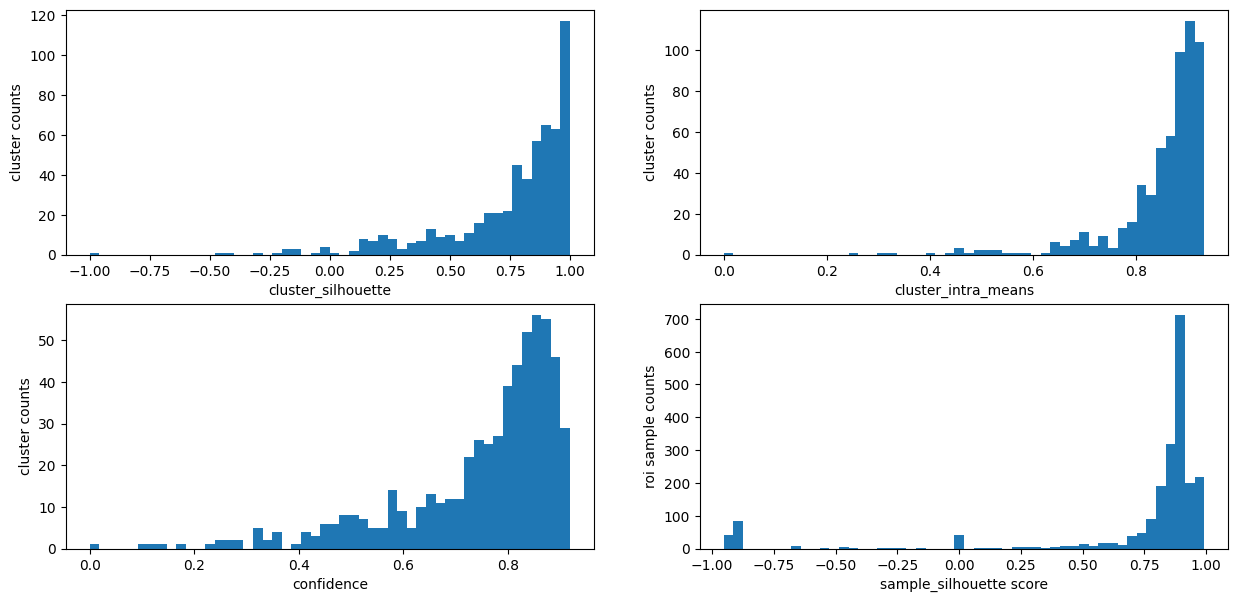

In [13]:
## Plot the distribution of the quality metrics

confidence = (((np.array(results['clusters']['quality_metrics']['cluster_silhouette']) + 1) / 2) * np.array(results['clusters']['quality_metrics']['cluster_intra_means']))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,7))

axs[0,0].hist(results['clusters']['quality_metrics']['cluster_silhouette'], 50);
axs[0,0].set_xlabel('cluster_silhouette');
axs[0,0].set_ylabel('cluster counts');

axs[0,1].hist(results['clusters']['quality_metrics']['cluster_intra_means'], 50);
axs[0,1].set_xlabel('cluster_intra_means');
axs[0,1].set_ylabel('cluster counts');

axs[1,0].hist(confidence, 50);
axs[1,0].set_xlabel('confidence');
axs[1,0].set_ylabel('cluster counts');

axs[1,1].hist(results['clusters']['quality_metrics']['sample_silhouette'], 50);
axs[1,1].set_xlabel('sample_silhouette score');
axs[1,1].set_ylabel('roi sample counts');

In [14]:
# Use Metrics for Quality Control
# Three criteria: cluster_sihouette, sample_sihouette, confidence

cluster_sihouette_threshold = 0.2
confidence_threshold = 0.6
sample_sihouette_threshold = 0.1

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

below_threshold_list = []
for idx in range(len(results['clusters']['quality_metrics']['cluster_silhouette'])):
    if results['clusters']['quality_metrics']['cluster_silhouette'][idx] < cluster_sihouette_threshold or confidence[idx] < confidence_threshold:  
        below_threshold_list.append(idx-1)
for idx in range(len(results['clusters']['quality_metrics']['sample_silhouette'])):
    if results['clusters']['quality_metrics']['sample_silhouette'][idx] < sample_sihouette_threshold:
        below_threshold_list.append(results['clusters']['labels'][idx])
below_threshold_list = np.unique(below_threshold_list)

labels_keep = []
for i in range(max(results['clusters']['labels_bySession'][0])+1):
    if i not in below_threshold_list:
        labels_keep.append(i)

## Remove bad cluster labels
# labels_masked_keep = roicat.util.mask_UCIDs_by_label(
#     ucids=labels_iscell, 
#     labels=labels_keep,
# )

## Align the data without the masked labels
data_aligned = roicat.util.match_arrays_with_ucids(
    arrays=fluorescence_data, 
    ucids=results['clusters']['labels_bySession'],
)


# !!! Important !!! Use this one to remove bad cluster labels if you skip the first two steps
labels_masked_keep = roicat.util.mask_UCIDs_by_label(
    ucids=results['clusters']['labels_bySession'], 
    labels=labels_keep,
)

## Squeeze the labels to remove the unassigned labels
labels_masked_keep = roicat.util.squeeze_UCID_labels(ucids=labels_masked_keep, return_array=True)  ## [(n_rois,)] * n_sessions

## Align the fluorescence data with the masked labels!!
data_aligned_masked_keep = roicat.util.match_arrays_with_ucids(
    arrays=fluorescence_data,  ## expects list (length n_sessions) of numpy arrays (shape (n_rois, n_timepoints))
    ucids=labels_masked_keep,  ## expects list (length n_sessions) of numpy arrays (shape (n_rois,))  OR   concatenated numpy array (shape (n_rois_total,))
)

## Check the results
print("Original data shapes [(n_rois, n_timepoints)] * n_sessions:")
print([d.shape for d in fluorescence_data])
print('')
print("First aligned data shapes [(n_rois, n_timepoints)] * n_sessions:")
print([d.shape for d in data_aligned])
print('')
# print("iscell masked aligned data shapes [(n_rois, n_timepoints)] * n_sessions:")
# print([d.shape for d in data_aligned_masked_iscell])
# print('')
# print('data_aligned_minSesh data shapes [(n_rois, n_timepoints)] * n_sessions:')
# print([d.shape for d in data_aligned_minSesh])
# print('')
print("labels_masked_keep aligned data shapes [(n_rois, n_timepoints)] * n_sessions:")
print([d.shape for d in data_aligned_masked_keep])

Original data shapes [(n_rois, n_timepoints)] * n_sessions:
[(520, 2188), (605, 57220), (554, 56293), (433, 1785)]

First aligned data shapes [(n_rois, n_timepoints)] * n_sessions:
[(582, 2188), (582, 57220), (582, 56293), (582, 1785)]

labels_masked_keep aligned data shapes [(n_rois, n_timepoints)] * n_sessions:
[(412, 2188), (412, 57220), (412, 56293), (412, 1785)]


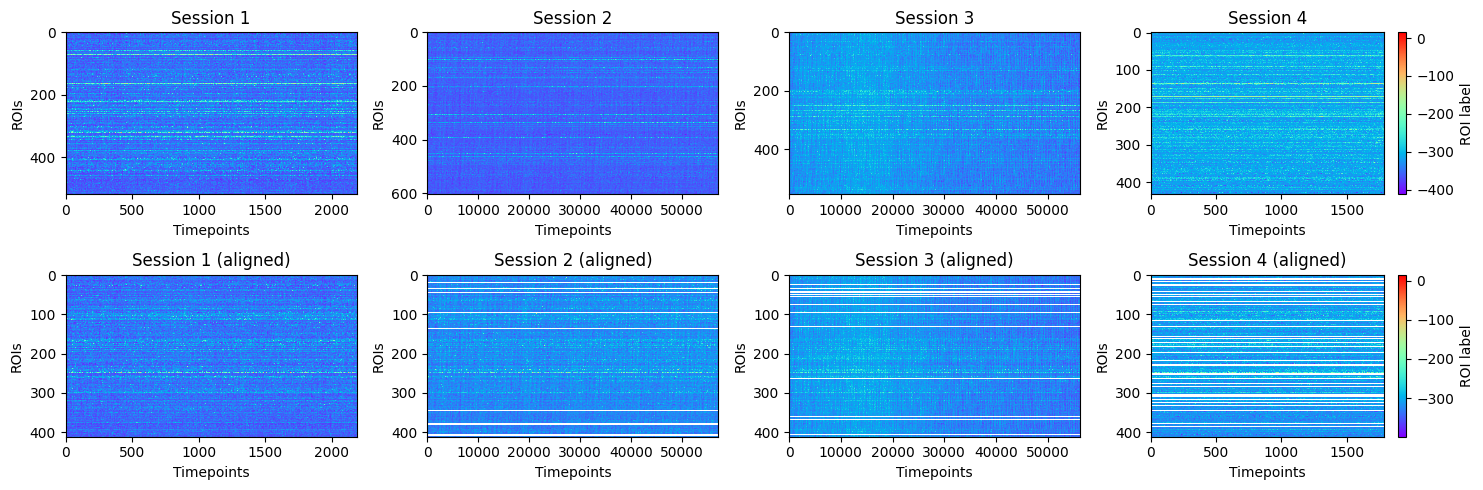

In [15]:
# plot the result again --- row1 is raw data, row2 is the aligned and masked data


n_sessions = 4   # IMPORTANT!!!! number of sessions


fig, axs = plt.subplots(2, n_sessions, figsize=(15, 5))
for i in range(n_sessions):
    axs[0, i].imshow(fluorescence_data[i],         aspect="auto", cmap="rainbow", interpolation="none")
    axs[1, i].imshow(data_aligned_masked_keep[i], aspect="auto", cmap="rainbow", interpolation="none")
    axs[0, i].set_title(f"Session {i+1}")
    axs[1, i].set_title(f"Session {i+1} (aligned)")
    axs[0, i].set_xlabel("Timepoints")
    axs[1, i].set_xlabel("Timepoints")
    axs[0, i].set_ylabel("ROIs")
    axs[1, i].set_ylabel("ROIs")
    ## Colorbar
    if i == n_sessions - 1:
        fig.colorbar(axs[0, i].imshow(fluorescence_data[i], aspect="auto", cmap="rainbow", interpolation="none"), ax=axs[0, i], label="ROI label")
        fig.colorbar(axs[1, i].imshow(data_aligned_masked_keep[i], aspect="auto", cmap="rainbow", interpolation="none"), ax=axs[1, i], label="ROI label")
plt.tight_layout()

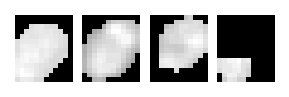

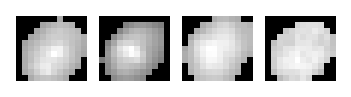

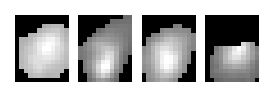

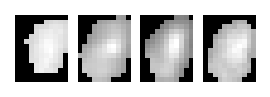

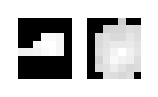

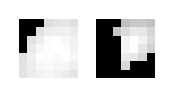

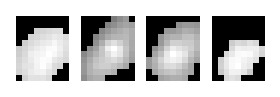

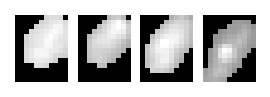

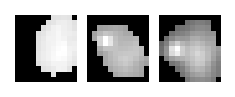

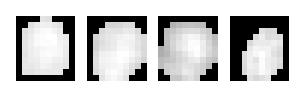

In [16]:
# Plot each cluster in different sessions

ROI_num = 100  # the number of ROIs to visualise

ucids = []  # get the ids for each cluster
for session in labels_masked_keep:
    for label in session:
        ucids.append(label)
ucids = np.array(ucids)
ucids_unique = np.unique(ucids[ucids>=0])

ROI_ims_sparse = scipy.sparse.vstack(results['ROIs']['ROIs_aligned'])
ROI_ims_sparse = ROI_ims_sparse.multiply( ROI_ims_sparse.max(1).power(-1) ).tocsr()

ucid_sfCat = []  # image for all ucids stored in this list
for ucid in ucids_unique:
    idx = np.where(ucids == ucid)[0]
    ucid_sfCat.append(np.concatenate(roicat.visualization.crop_cluster_ims(ROI_ims_sparse[idx].toarray().reshape(len(idx), results['ROIs']['frame_height'], results['ROIs']['frame_width'])), axis=1) )

for ii in range(min(len(ucid_sfCat), 10)):
    plt.figure(figsize=(40,1))
    plt.imshow(ucid_sfCat[ii], cmap='gray')
    plt.axis('off')


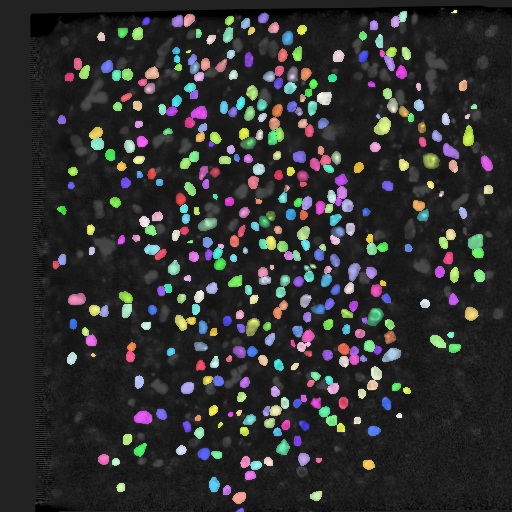

In [17]:
labels = []
for session in labels_masked_keep:
    for label in session:
        labels.append(label)
labels = np.array(labels)

FOVs_colored = roicat.visualization.compute_colored_FOV(
    labels=labels,
    spatialFootprints=results['ROIs']['ROIs_aligned'], 
    FOV_height=results['ROIs']['frame_height'], 
    FOV_width=results['ROIs']['frame_width'], 
)

def to_rgb(img):
    """Convert grayscale (H, W) image to RGB (H, W, 3)"""
    if img.ndim == 2:
        return np.stack([img]*3, axis=-1)
    return img

def overlay_images(base_gray, overlay_rgb, alpha=0.6):
    """
    Overlay RGB mask on top of grayscale image.
    base_gray: (H, W), grayscale image
    overlay_rgb: (H, W, 3), color image
    alpha: blending factor for overlay
    """
    base_rgb = to_rgb(base_gray).astype(np.float32)
    overlay_rgb = overlay_rgb.astype(np.float32)
    
    # Normalize both to [0, 1] if not already
    if base_rgb.max() > 1.0:
        base_rgb /= 255.0
    if overlay_rgb.max() > 1.0:
        overlay_rgb /= 255.0

    blended = (1 - alpha) * base_rgb + alpha * overlay_rgb
    return np.clip(blended, 0, 1)  # Keep in float range [0, 1] for display

combined_images = [
    overlay_images(roicat_img, fov_img, alpha=0.6)
    for roicat_img, fov_img in zip(ims, FOVs_colored)]

roicat.visualization.display_toggle_image_stack(combined_images)